### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
# Calculando o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento.
faturamentoLoja1 = round(loja['Preço'].sum(),2)
faturamentoLoja2 = round(loja2['Preço'].sum(),2)
faturamentoLoja3 = round(loja3['Preço'].sum(),2)
faturamentoLoja4 = round(loja4['Preço'].sum(),2)

# Calculando o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento.
faturamentoTotal = round(faturamentoLoja1 + faturamentoLoja2 + faturamentoLoja3 + faturamentoLoja4,2)

In [ ]:
# Exibindo os resultados dos faturamentos
print(f'Faturamento Loja 1: R$ {faturamentoLoja1}')
print(f'Faturamento Loja 2: R$ {faturamentoLoja2}')
print(f'Faturamento Loja 3: R$ {faturamentoLoja3}')
print(f'Faturamento Loja 4: R$ {faturamentoLoja4}')

print(f'Faturamento Total: R$ {faturamentoTotal}')

Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58
Faturamento Total: R$ 5871490.79


In [ ]:
# Criando um dicionário com o nome da loja e o faturamento
faturamentos = {
    'Loja 1': faturamentoLoja1,
    'Loja 2': faturamentoLoja2,
    'Loja 3': faturamentoLoja3,
    'Loja 4': faturamentoLoja4
}

In [ ]:
# Analisando qual loja teve o maior e menor faturamento
maiorFaturamento = max(faturamentos, key=faturamentos.get) #key=faturamentos.get retorna a chave (nome da loja) com o maior valor.
maiorValor = faturamentos[maiorFaturamento]
print(f'O maior faturamento foi de loja {maiorFaturamento} com o valor R$ {maiorValor}.')

menorFaturamento = min(faturamentos, key=faturamentos.get) #key=faturamentos.get retorna a chave (nome da loja) com o menor valor.
menorValor = faturamentos[menorFaturamento]
print(f'O menor faturamento foi de loja {menorFaturamento} com o valor R$ {menorValor}.')

O maior faturamento foi de loja Loja 1 com o valor R$ 1534509.12.
O menor faturamento foi de loja Loja 4 com o valor R$ 1384497.58.


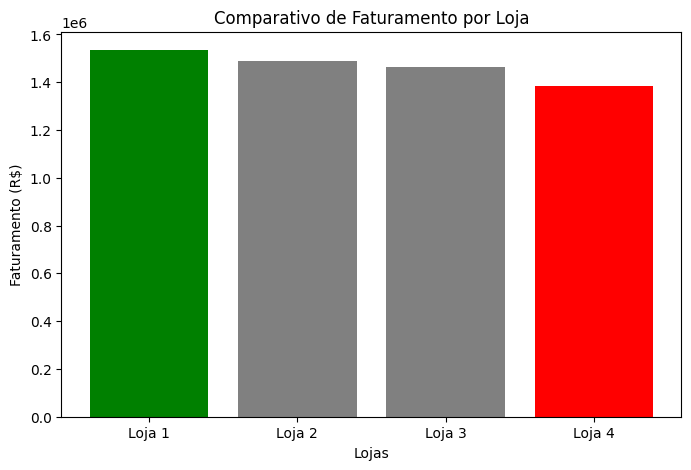

In [ ]:
# Criar um grafico do faturamento
import matplotlib.pyplot as plt

# Dados
lojas = list(faturamentos.keys())
valores = list(faturamentos.values())

# Descobrindo o índice da loja com maior e menor faturamento
indice_maior = list(faturamentos.keys()).index(maiorFaturamento)
indice_menor = list(faturamentos.keys()).index(menorFaturamento)

# Criando uma lista de cores: todas cinza, exceto a loja com maior faturamento em verde e menor faturamento em vermelho
cores = ['gray'] * len(lojas)
cores[indice_maior] = 'green'
cores[indice_menor] = 'red'

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))  # tamanho da figura
plt.bar(lojas, valores, color=cores)

plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.title('Comparativo de Faturamento por Loja')
plt.show()

# 2. Vendas por Categoria


In [117]:
# Adicionar uma coluna chamada "Loja":

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Unimos tudo em um único DataFrame:
lojas = pd.concat([loja, loja2, loja3, loja4])

In [120]:
# Venda total dos produtos por categoria
categoriaProduto = lojas['Categoria do Produto'].value_counts()
categoriaProduto

,count
Categoria do Produto,
moveis,1886
eletronicos,1772
brinquedos,1290
eletrodomesticos,1149
esporte e lazer,1113
instrumentos musicais,753
livros,742
utilidades domesticas,730


In [124]:
# Vendas dos produtos por lojas
vendasProdutosLoja = lojas.groupby(['Loja', 'Categoria do Produto'])['Produto'].count()
vendasProdutosLoja

Loja    Categoria do Produto 
Loja 1  brinquedos               324
        eletrodomesticos         312
        eletronicos              448
        esporte e lazer          284
        instrumentos musicais    182
        livros                   173
        moveis                   465
        utilidades domesticas    171
Loja 2  brinquedos               313
        eletrodomesticos         305
        eletronicos              422
        esporte e lazer          275
        instrumentos musicais    224
        livros                   197
        moveis                   442
        utilidades domesticas    181
Loja 3  brinquedos               315
        eletrodomesticos         278
        eletronicos              451
        esporte e lazer          277
        instrumentos musicais    177
        livros                   185
        moveis                   499
        utilidades domesticas    177
Loja 4  brinquedos               338
        eletrodomesticos         254
        eletronicos              451
        esporte e lazer          277
        instrumentos musicais    170
        livros                   187
        moveis                   480
        utilidades domesticas    201
Name: Produto, dtype: int64

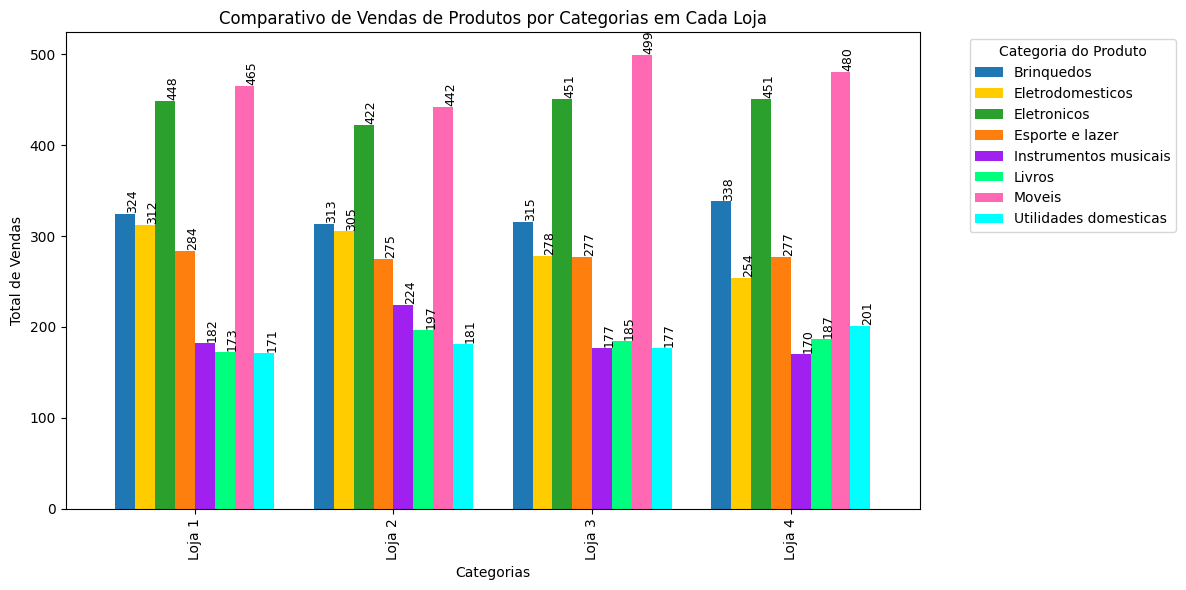

In [125]:
# Transpondo para categorias no eixo X
vendasTransposto = vendasProdutosLoja.unstack()

# Definindo as cores na ordem das colunas (lojas)
cores_personalizadas = ['#1f77b4', '#ffcc00', '#2ca02c', '#ff7f0e', '#A020F0', '#00FF7F', '#FF69B4', '#00FFFF']

# Criando o gráfico de barras verticais
ax = vendasTransposto.plot(kind='bar', figsize=(12, 6), width=0.8, color=cores_personalizadas)

# Título e rótulos
plt.title('Comparativo de Vendas de Produtos por Categorias em Cada Loja')
plt.xlabel('Categorias')
plt.ylabel('Total de Vendas')

# Adicionando os valores acima de cada barra, na vertical
for barras in ax.containers:
    for barra in barras:
        altura = barra.get_height()
        if altura > 0:
            ax.text(
                barra.get_x() + barra.get_width() / 2,
                altura + 1,
                f'\n{altura:}',
                ha='center', va='bottom', fontsize=9, rotation=90
            )

# Legenda com nomes das lojas
plt.legend(title='Categoria do Produto', labels=['Brinquedos', 'Eletrodomesticos', 'Eletronicos', 'Esporte e lazer', 'Instrumentos musicais', 'Livros', 'Moveis', 'Utilidades domesticas'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Produto mais vendido por Categoria e em qual loja
protudoMaisVendido = vendasProdutosLoja.idxmax()
print(f'O produto mais vendido foi os {protudoMaisVendido[1]}, na {protudoMaisVendido[0]}.')

O produto mais vendido foi os moveis, na Loja 3.


In [ ]:
# Produto mmenos vendido por Categoria e em qual loja
produtoMenosVendido = vendasProdutosLoja.idxmin()
print(f'O produto menos vendido foi os {produtoMenosVendido[1]}, na {produtoMenosVendido[0]}.')

O produto menos vendido foi os instrumentos musicais, na Loja 4.


# 3. Média de Avaliação das Lojas

In [ ]:
import pandas as pd
# Calculando a média de avaliações por loja
avaliacoes = {
    "Loja 1": loja["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean()
}

# Transformando em Series do pandas
mediaAvaliacoes = pd.Series(avaliacoes)

# Exibindo no terminal
print("Média de Avaliação das Lojas:\n", mediaAvaliacoes.round(2))

Média de Avaliação das Lojas:
 Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
dtype: float64


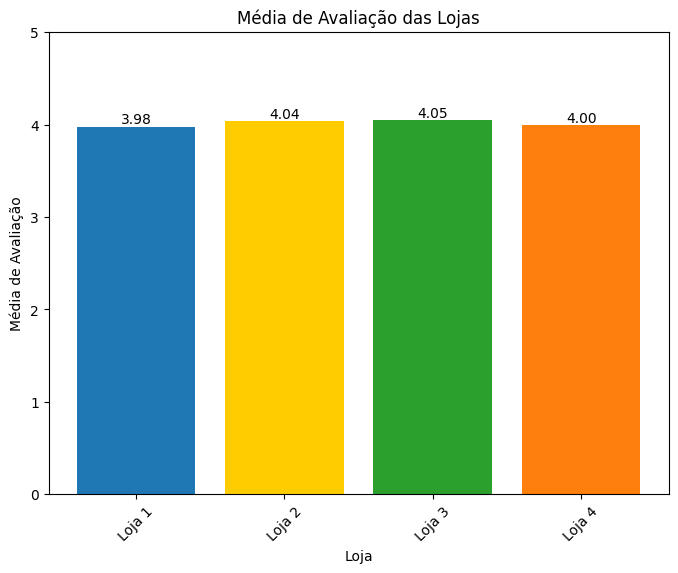

In [ ]:
# Grafico
# Cores personalizadas
cores = ['#1f77b4', '#ffcc00', '#2ca02c', '#ff7f0e']  # azul, amarelo, verde, laranja

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(mediaAvaliacoes.index, mediaAvaliacoes.values, color=cores)


# Títulos e rótulos
plt.title('Média de Avaliação das Lojas')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.ylim(0 , 5)  # Avaliações normalmente vão de 0 a 5
plt.xticks(rotation=45)

exibirvalores = [valor.get_height() for valor in barras]
for valor in barras:
    plt.text(
        valor.get_x() + valor.get_width() / 2,
        valor.get_height(),
        f'{valor.get_height():.2f}'
        , ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [119]:
# Venda total dos produtos
vendasProdutosLoja = lojas.groupby(['Loja', 'Produto'])['Produto'].count()
display(vendasProdutosLoja)

Loja    Produto           
Loja 1  Assistente virtual    40
        Bateria               53
        Bicicleta             54
        Blocos de montar      56
        Bola de basquete      55
                              ..
Loja 4  Sofá retrátil         47
        TV Led UHD 4K         40
        Tablet ABXY           45
        Violão                37
        Xadrez de madeira     39
Name: Produto, Length: 204, dtype: int64

In [127]:
produtosMaisVendidosporLoja = vendasProdutosLoja.groupby('Loja').idxmax()
produtosMaisVendidosporLoja

produtoMenosVendidosporLoja = vendasProdutosLoja.groupby('Loja').idxmin()
produtoMenosVendidosporLoja

,Produto
Loja,
Loja 1,"(Loja 1, utilidades domesticas)"
Loja 2,"(Loja 2, utilidades domesticas)"
Loja 3,"(Loja 3, instrumentos musicais)"
Loja 4,"(Loja 4, instrumentos musicais)"


In [144]:
produtosVendidos = lojas["Produto"].value_counts()

# Produtos mais vendidos
print("Produto mais vendido:", produtosVendidos.idxmax())
print("Quantidade vendida:", produtosVendidos.max())
print("Top 10 produtos mais vendidos", produtosVendidos.head(10))

Produto mais vendido: Cômoda
Quantidade vendida: 210
Top 10 produtos mais vendidos Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64


In [145]:
# Produtos menos Vendidos
print("Produto menos vendido:", produtosVendidos.idxmin())
print("Quantidade vendida:", produtosVendidos.min())
print("Top 10 produtos menos vendidos", produtosVendidos.tail(10))

Produto menos vendido: Celular ABXY
Quantidade vendida: 157
Top 10 produtos menos vendidos Produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


/tmp/ipython-input-156-3581405075.py:30: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-156-3581405075.py:30: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


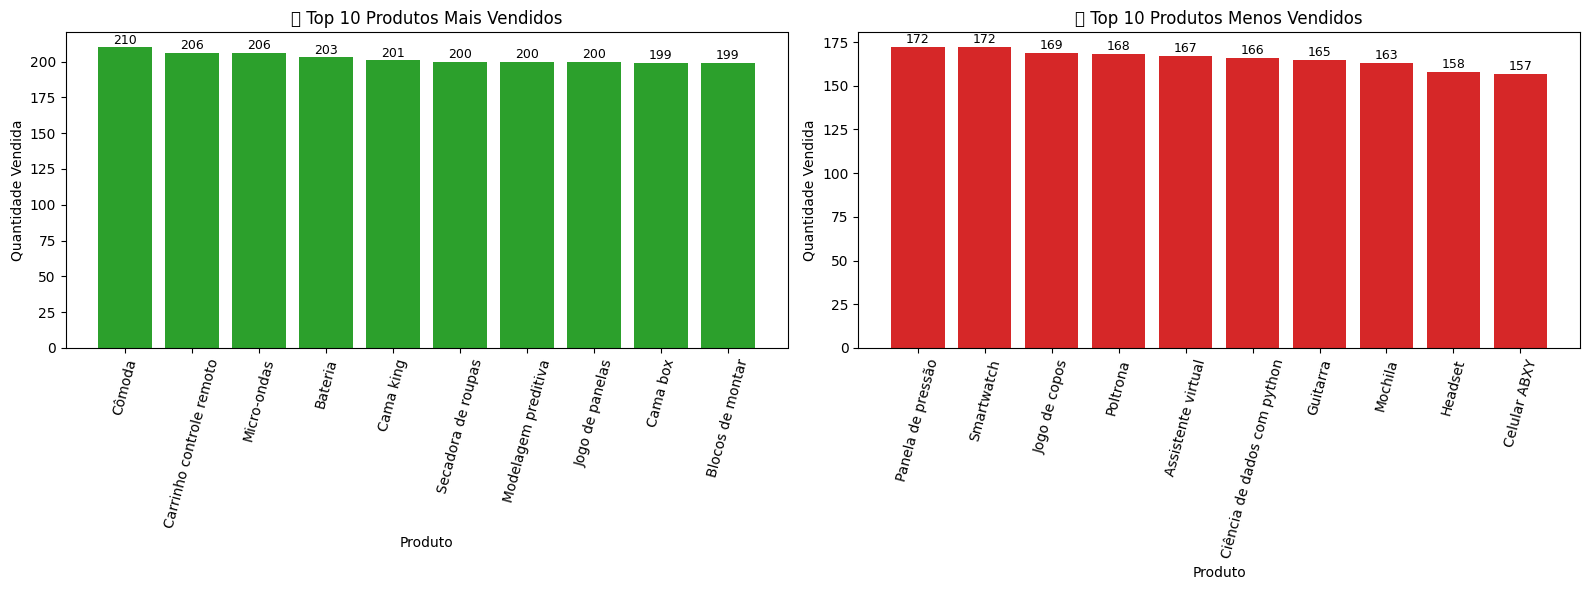

In [156]:
# Criando os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Get the top and bottom 10 products
top_mais_vendidos = produtosVendidos.head(10)
top_menos_vendidos = produtosVendidos.tail(10)

# --- Gráfico: Mais Vendidos ---
axes[0].bar(top_mais_vendidos.index, top_mais_vendidos.values, color='#2ca02c')  # verde
axes[0].set_title('🔝 Top 10 Produtos Mais Vendidos')
axes[0].set_xlabel('Produto')
axes[0].set_ylabel('Quantidade Vendida')
axes[0].tick_params(axis='x', rotation=75)

# Adiciona os valores acima das barras
for i, valor in enumerate(top_mais_vendidos.values):
    axes[0].text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=9)

# --- Gráfico: Menos Vendidos ---
axes[1].bar(top_menos_vendidos.index, top_menos_vendidos.values, color='#d62728')  # vermelho
axes[1].set_title('🔻 Top 10 Produtos Menos Vendidos')
axes[1].set_xlabel('Produto')
axes[1].set_ylabel('Quantidade Vendida')
axes[1].tick_params(axis='x', rotation=75)

# Adiciona os valores acima das barras
for i, valor in enumerate(top_menos_vendidos.values):
    axes[1].text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [ ]:
mediaFrete = {
    "Loja 1": loja["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}
mediaFrete = pd.Series(mediaFrete)
print("Média de Frete das Lojas:\n", mediaFrete.round(2))

Média de Frete das Lojas:
 Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
dtype: float64


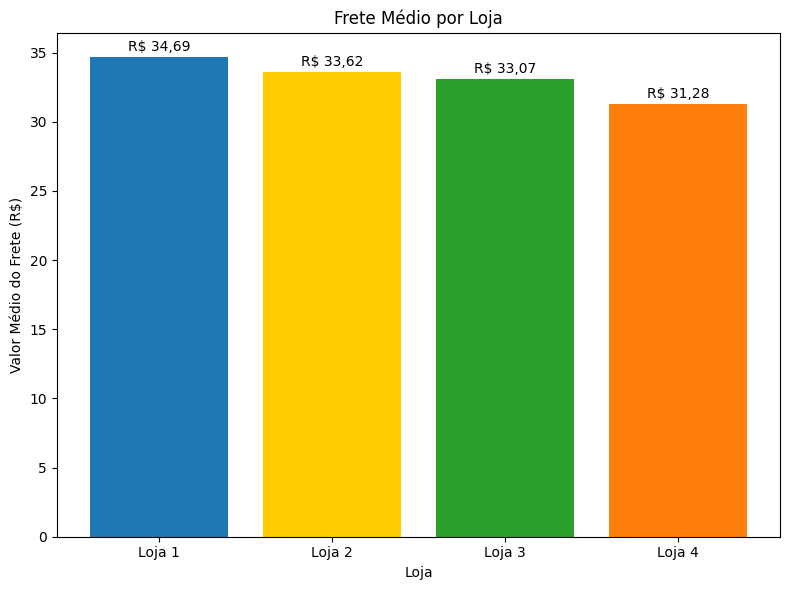

In [153]:
# Cores personalizadas por loja
cores = ['#1f77b4', '#ffcc00', '#2ca02c', '#ff7f0e']  # azul, amarelo, verde, laranja

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(mediaFrete.index, mediaFrete.values, color=cores)

# Adicionando valores no topo das barras
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura + 0.2,
        f'R$ {altura:.2f}'.replace('.', ','),
        ha='center', va='bottom', fontsize=10
    )

# Títulos e rótulos
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Valor Médio do Frete (R$)')

plt.tight_layout()
plt.show()

# 📈 Relatório de Análise de Vendas – Lojas 1 a 4

Projeto: Análise de Dados de Vendas

Fonte dos dados: Alura Challenge - Data Science

# 1.   Objetivo

Este relatório tem como finalidade apoiar o Sr. João na tomada de decisão sobre qual loja virtual vender para levantar capital e investir em um novo negócio.
A partir da análise de dados de desempenho de quatro lojas da Allure Store, identificamos padrões de vendas, avaliações de clientes e indicadores logísticos para embasar essa escolha.

# 2.   Base de Dados
A análise foi realizada a partir da união de quatro arquivos CSV, cada um representando os dados de uma loja virtual. Os dados incluem informações sobre pedidos, categorias de produtos, avaliações dos clientes e valores de frete.



# 3.   Faturamento Total 💰

O faturamento acumulado das quatro lojas foi de R$ 5.871.490,79, com a seguinte distribuição:

* Faturamento Loja 1: R$ 1534509.12

* Faturamento Loja 2: R$ 1488459.06

* Faturamento Loja 3: R$ 1464025.03

* Faturamento Loja 4: R$ 1384497.58

O maior faturamento foi de Loja 1 com o valor R$ 1534509.12.

O menor faturamento foi de Loja 4 com o valor R$ 1384497.58.


# 4.   Vendas por Categoria 📦
As categorias com maior número de vendas foram:



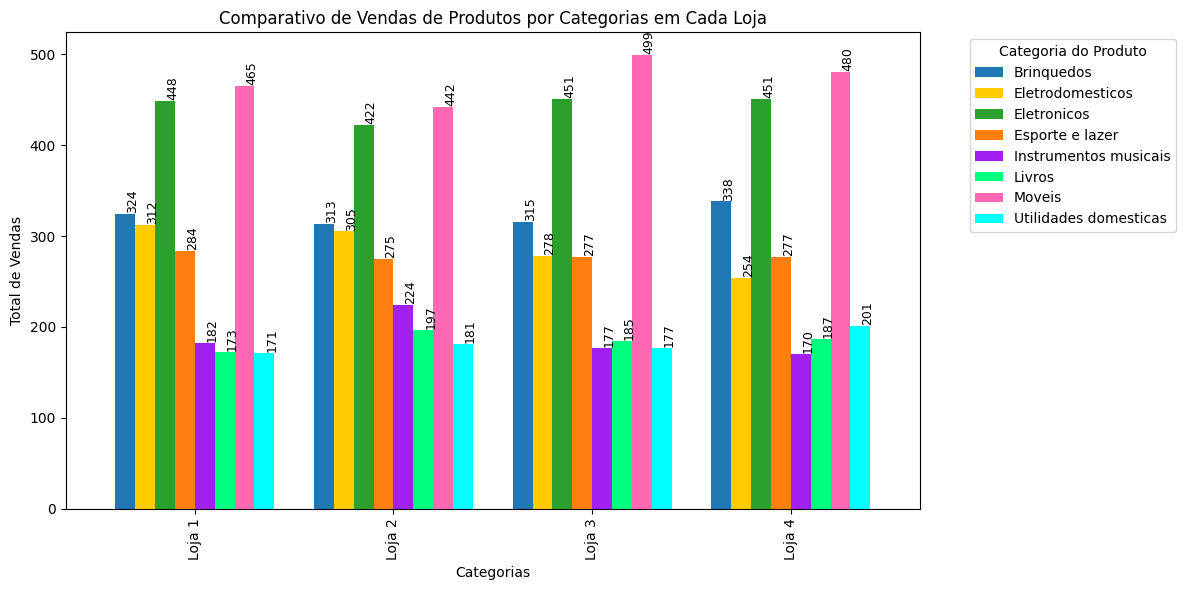

O produto menos vendido foi os instrumentos musicais, na Loja 4.

O produto mais vendido foi os moveis, na Loja 3.

# 4. Avaliação Média das Lojas ⭐
A média das avaliações dos clientes por loja foi:

Com a média de Avaliação da loja mais alta doi a Loja 3 com a pontuação de 4,05%. E a menos avaliada foi aLoja 4 com a pontuação de 3,98%.

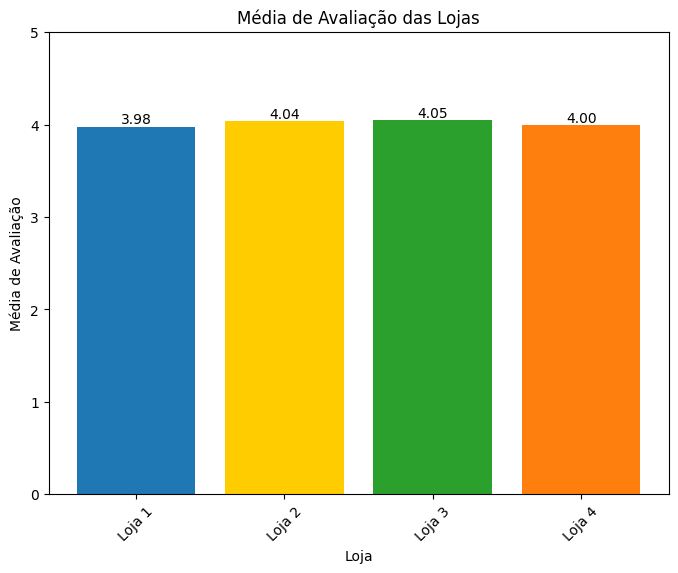

# 1.   Produtos Mais e Menos Vendidos 🔥❄️

🔥 Top 10 produtos mais vendidos Produto

1. Cômoda                      210
2. Carrinho controle remoto    206
3. Micro-ondas                 206
4. Bateria                     203
5. Cama king                   201
6. Secadora de roupas          200
7. Modelagem preditiva         200
8. Jogo de panelas             200
9. Cama box                    199
10. Blocos de montar            199



❄️Top 10 produtos menos vendidos Produto

1. Panela de pressão              172
2. Smartwatch                     172
3. Jogo de copos                  169
4. Poltrona                       168
5. Assistente virtual             167
6. Ciência de dados com python    166
7. Guitarra                       165
8. Mochila                        163
9. Headset                        158
10. Celular ABXY                   157


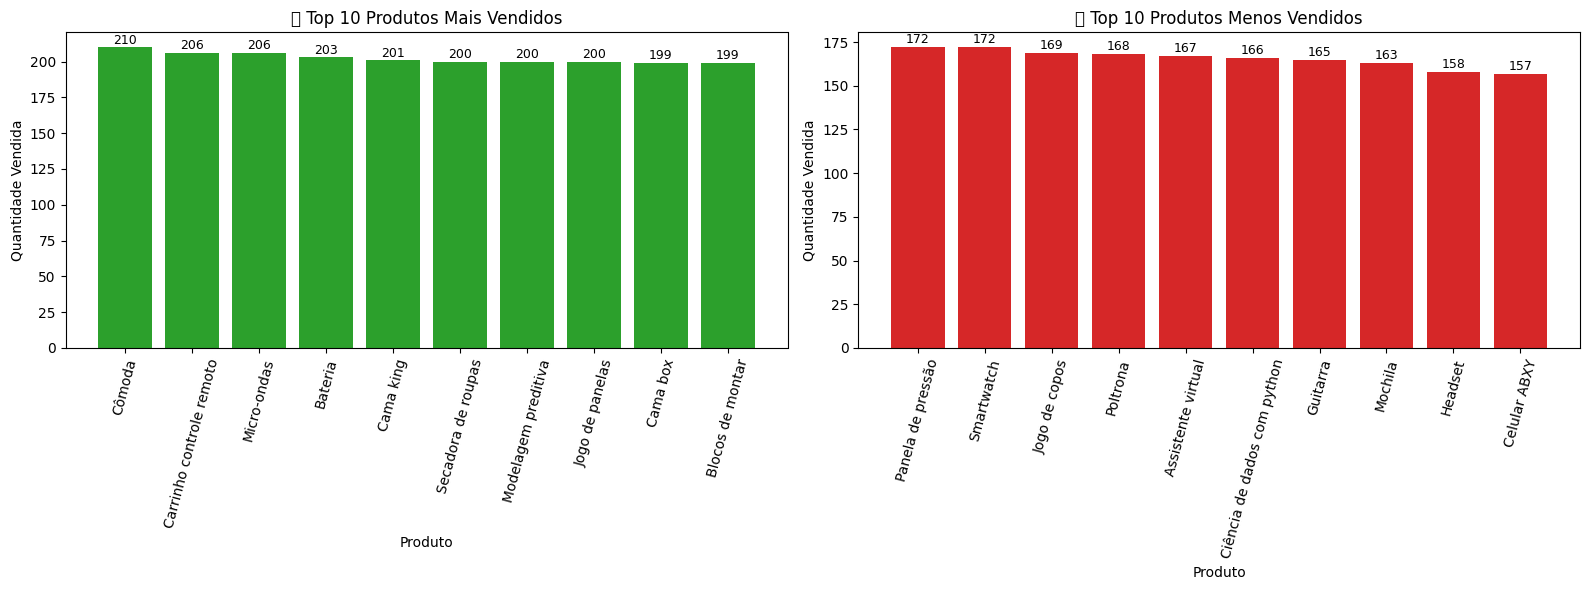

# 7. Frete Médio por Loja 🚚



 🚚 Média de Frete das Lojas:
* Loja 1    34.69
* Loja 2    33.62
* Loja 3    33.07
* Loja 4    31.28

Loja 4 com o menor frete.

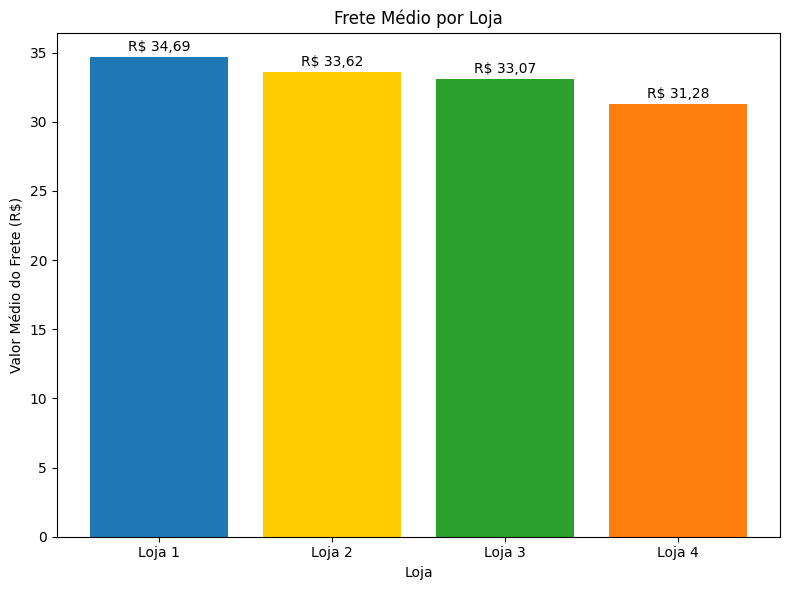

# Conclusão e Recomendação ✅


Após a realização da análise verifiquei que a Loja 4 teve o menor faturamento.

Ela não se destacou em avaliação de clientes nem em volume de vendas por categoria.

Apesar do menor custo médio de frete, isso não foi suficiente para melhorar seu desempenho geral.

## 💼 Recomendação:
Recomendo ao Sr. João realize a vender da Loja 4.
Ela apresenta o desempenho mais fraco entre as lojas analisadas, sendo a opção mais estratégica para que o Sr. João possa levantar capital e investir em seu novo negócio.